In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

# Lectura de datos

<!-- Basado en el repositorio de https://github.com/leventbass/logistic_regression/blob/master/Logistic_Regression.ipynb-->
Data set a usar es https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
Se refiere a al cancer de mamografía pero sin imagenes sino con registros historicos
- Diagnosis (M = malignant, B = benign)
- texture (desviación estandar de los valores de la escala de grises)
- smoothness (variación local en longitudes del radio)

In [2]:
df = pd.read_csv("dataset/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
columns_x = ["texture_mean","smoothness_mean"]
label_y = "diagnosis" # Diagnosis (M = malignant, B = benign)
df = df[columns_x+[label_y]]
df.head()

,texture_mean,smoothness_mean,diagnosis
0,10.38,0.11840,M
1,17.77,0.08474,M
2,21.25,0.10960,M
3,20.38,0.14250,M
4,14.34,0.10030,M


# Tratar con perdida de  datos, datos null 

In [4]:
df.isnull().sum()

texture_mean       0
smoothness_mean    0
diagnosis          0
dtype: int64

# Transformar etiqueta a Binario

In [5]:
def cast_diag_binary(diag):
    if diag == "M":
        return 1
    else: # B
        return 0

In [6]:
# Copy to label in seaborn
diagnos_original_label = df[label_y].copy()

In [7]:
new_colum_y_binary = df[label_y].apply(cast_diag_binary)

np.unique(new_colum_y_binary)

array([0, 1], dtype=int64)

# Normalización de datos

In [8]:
df = df[columns_x]

In [9]:
from sklearn import preprocessing
#normalizar     
scaler = preprocessing.StandardScaler(with_std=True,with_mean=True).fit(df)
scaler_data = scaler.transform(df)
df = pd.DataFrame(scaler_data,columns=df.columns)

In [10]:
label_y= "diagnosis_binary"

In [11]:
df[label_y] = new_colum_y_binary
df["diagnosis"] = diagnos_original_label
df.head()

,texture_mean,smoothness_mean,diagnosis_binary,diagnosis
0,-2.073335,1.568466,1,M
1,-0.353632,-0.826962,1,M
2,0.456187,0.942210,1,M
3,0.253732,3.283553,1,M
4,-1.151816,0.280372,1,M


# Implementación de Regresión Logistica

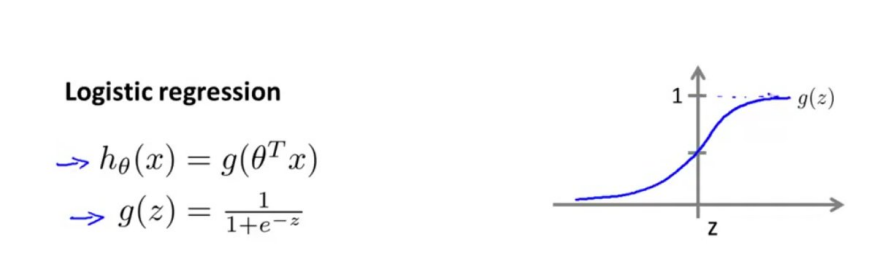

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

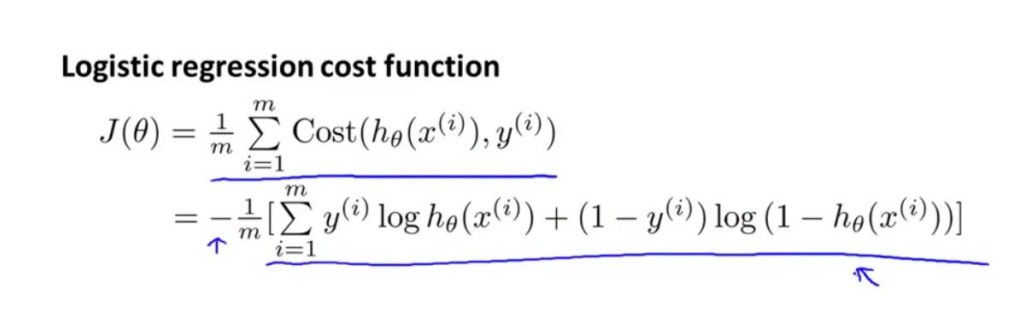

In [13]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    
    y = y.T
    cost = (1/m)*((-y).dot(np.log(h))-(1-y).dot(np.log(1-h)))
    
    return cost

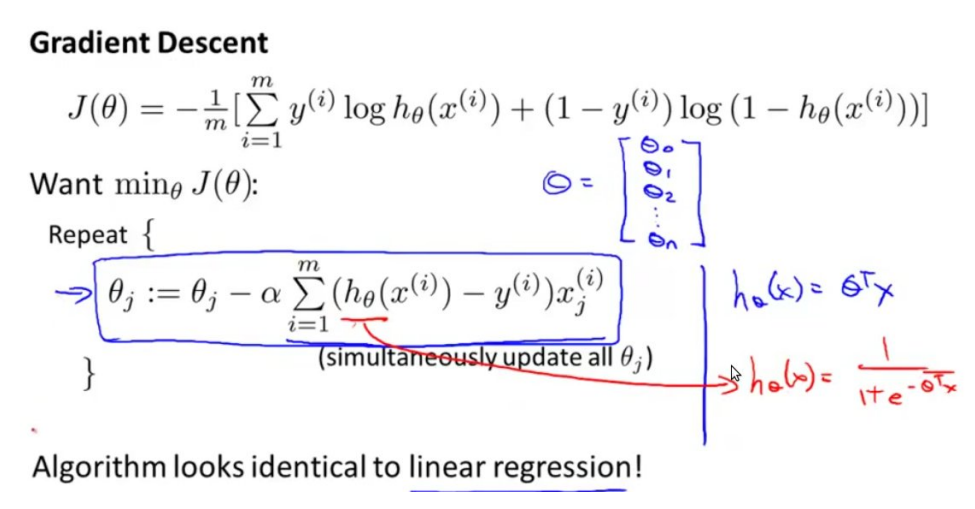

In [14]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T.dot(sigmoid(X.dot(params)) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [15]:
def predict(X, params):
    return np.round(sigmoid(X.dot(params)))

# Separación de Datos 

In [16]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=30)

df_train_x = df_train[columns_x].to_numpy()
df_train_y = df_train[[label_y]].to_numpy()
    
df_test_x = df_test[columns_x].to_numpy()
df_test_y = df_test[[label_y]].to_numpy()

In [17]:
print(df_train_x[:10])
print(df_train_x.shape)

[[ 1.32418299 -0.10534487]
 [-1.03779014 -1.34860514]
 [ 0.25373211  3.28355348]
 [ 0.49342003  0.38711999]
 [ 0.47945762  1.87447773]
 [-1.22628258 -1.29736602]
 [ 0.50505536 -0.91164932]
 [ 0.84248009  1.36208655]
 [ 0.58650271  0.05548903]
 [-2.22924851 -0.0299095 ]]
(398, 2)


In [18]:
print(df_train_y[:10])
print(df_train_y.shape)

[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
(398, 1)


In [19]:
df_train.head()

,texture_mean,smoothness_mean,diagnosis_binary,diagnosis
100,1.324183,-0.105345,1,M
398,-1.037790,-1.348605,0,B
3,0.253732,3.283553,1,M
419,0.493420,0.387120,0,B
41,0.479458,1.874478,1,M


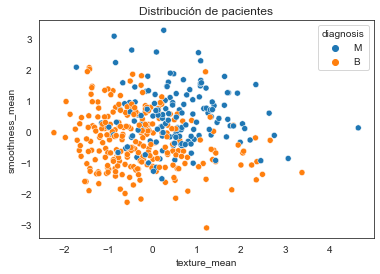

In [20]:

# Where y = x_2
sns.set_style('white')
sns.scatterplot( hue=df_train.diagnosis,
                x=df_train.texture_mean,
                y=df_train.smoothness_mean,
                legend = "auto").set(title="Distribución de pacientes");


In [21]:
# Agregar columna extra
m = len(df_train_y)
df_train_x = np.hstack((np.ones((m,1)),df_train_x))
df_train_x[:10]

array([[ 1.        ,  1.32418299, -0.10534487],
       [ 1.        , -1.03779014, -1.34860514],
       [ 1.        ,  0.25373211,  3.28355348],
       [ 1.        ,  0.49342003,  0.38711999],
       [ 1.        ,  0.47945762,  1.87447773],
       [ 1.        , -1.22628258, -1.29736602],
       [ 1.        ,  0.50505536, -0.91164932],
       [ 1.        ,  0.84248009,  1.36208655],
       [ 1.        ,  0.58650271,  0.05548903],
       [ 1.        , -2.22924851, -0.0299095 ]])

In [22]:
n = np.size(df_train_x,1)
params = np.zeros((n,1))

iterations = 300
learning_rate = 0.03

Costo Inicial is: [[0.69314718]] 

Thethas optimos: 
 [[-0.50267089]
 [ 0.7811845 ]
 [ 0.74274168]] 



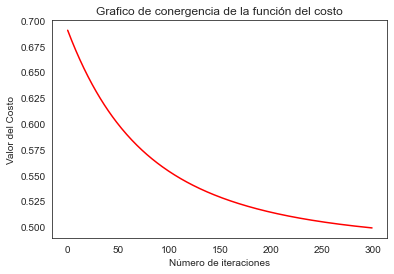

In [23]:
initial_cost = compute_cost(df_train_x, df_train_y, params)

print("Costo Inicial is: {} \n".format(initial_cost))

# aprendizaje 
(cost_history, params_optimal) = gradient_descent(df_train_x, df_train_y, params, learning_rate, iterations)

print("Thethas optimos: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Grafico de conergencia de la función del costo")
plt.xlabel("Número de iteraciones")
plt.ylabel("Valor del Costo")
plt.show()

In [24]:
y_pred = predict(df_train_x, params_optimal)
score = float(sum(y_pred == df_train_y))/ float(len(df_train_y))

print(score)

0.7512562814070352


In [117]:
print(params_optimal)
params_optimal = params_optimal.reshape(3)
params_optimal

[[-0.50267089]
 [ 0.7811845 ]
 [ 0.74274168]]


array([-0.50267089,  0.7811845 ,  0.74274168])

# Dibujo de la recta de separación
https://www.youtube.com/watch?v=3mLbNkt7j9g

In [121]:
def get_y_to_line(x_data,thetas):
    return -(thetas[0]+thetas[1]*x_data)/thetas[2]

In [131]:
decision_boundary = get_y_to_line(df_train_x.T[1],params_optimal)
decision_boundary[0:10]

array([-0.71594251,  1.76828162,  0.40991276,  0.15781908,  0.17250415,
        1.96653005,  0.14558153, -0.20930763,  0.05991863,  3.02140749])

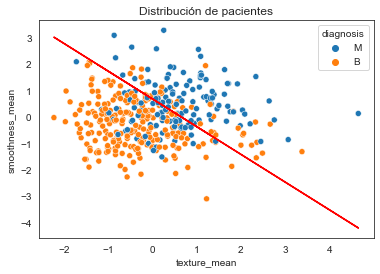

In [134]:
sns.set_style('white')
sns.scatterplot( hue=df_train.diagnosis,
                x=df_train.texture_mean,
                y=df_train.smoothness_mean,
                legend = "auto").set(title="Distribución de pacientes");

plt.plot(df_train_x.T[1],decision_boundary,'-r')

E:\anaconda3\envs\ia_pract_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


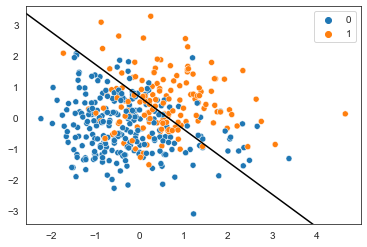

In [135]:
# Dibujo con la pendiente
# https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(df_train_x[:,1],df_train_x[:,2],hue=df_train_y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

# Sklearn

In [136]:
#IMPORTING LIBRARIES FROM SKLEARN
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [141]:
#Create an instance of the model
LR=LogisticRegression()

In [162]:
# Eliminar la columna de 1 en "x" y array con 1 dimensión  para "y" 
df_train_y = df_train_y.flatten()
df_train_x = df_train_x.T[1:]
df_train_x.shape
df_train_x = df_train_x.T

(2, 398)

In [172]:
# Llenar el modelo con daotss
LR.fit(df_train_x,df_train_y)

LogisticRegression()

In [175]:
LR.score(df_train_x,df_train_y) 

0.7487437185929648

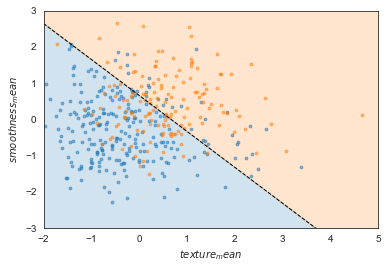

In [176]:
# Ploteo de https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
# Retrieve the model parameters.
b = LR.intercept_[0]
w1, w2 = LR.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -2, 5
ymin, ymax = -3, 3
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*df_train_x[df_train_y==0].T, s=8, alpha=0.5)
plt.scatter(*df_train_x[df_train_y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$smoothness_mean$')
plt.xlabel(r'$texture_mean$')

plt.show()